<h1 align="center">Diabetes Prediction</h1>

<img src='diabetes.png' height=500 width=800 />

#### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

#### Loading the diabetes dataset

In [2]:
df=pd.read_csv("diabetes.csv")

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


#### Checking the null values in the dataset

In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### Statistics of each column

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

### Exploring each column and identifying the outliers ( Visualizations )

<AxesSubplot:xlabel='Outcome', ylabel='count'>

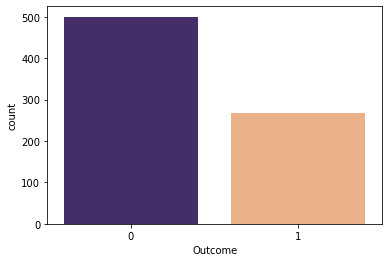

In [8]:
sns.countplot(x="Outcome",data=df,palette=["#432371","#FAAE7B"])

<AxesSubplot:>

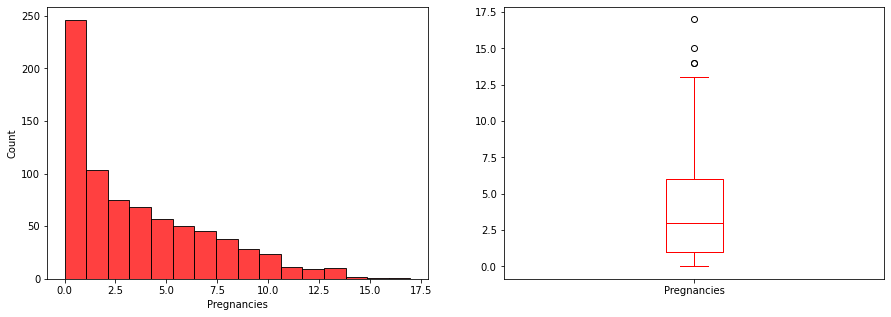

In [9]:
plt.figure(3)
plt.subplot(121)
sns.histplot(df["Pregnancies"],color="red")
plt.subplot(122)
df["Pregnancies"].plot.box(figsize=(15,5),color="red")

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

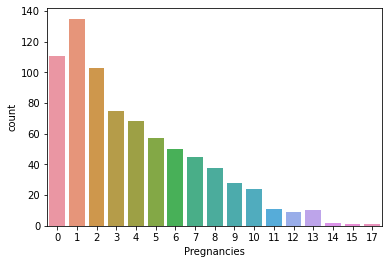

In [10]:
sns.countplot(x="Pregnancies",data=df)

<AxesSubplot:>

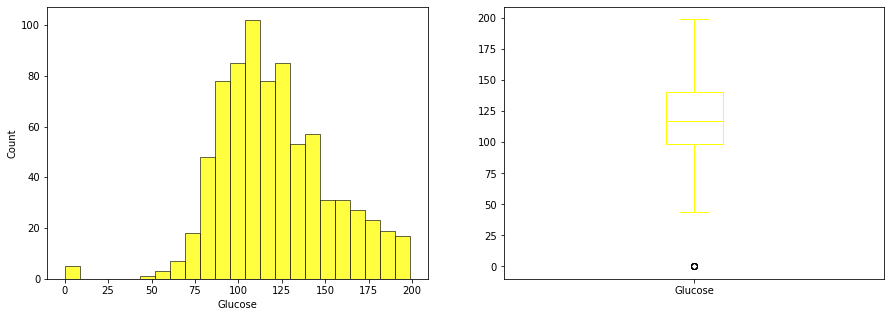

In [11]:
plt.figure(3)
plt.subplot(121)
sns.histplot(df["Glucose"],color="yellow")
plt.subplot(122)
df["Glucose"].plot.box(figsize=(15,5),color="yellow")

<AxesSubplot:>

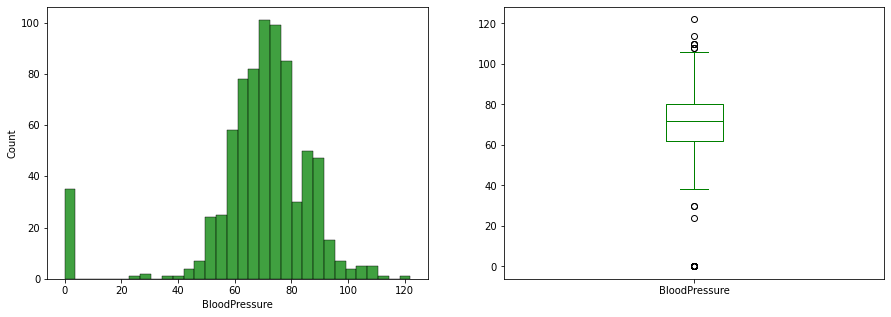

In [12]:
plt.figure(3)
plt.subplot(121)
sns.histplot(df["BloodPressure"],color="green")
plt.subplot(122)
df["BloodPressure"].plot.box(figsize=(15,5),color="green")

<AxesSubplot:>

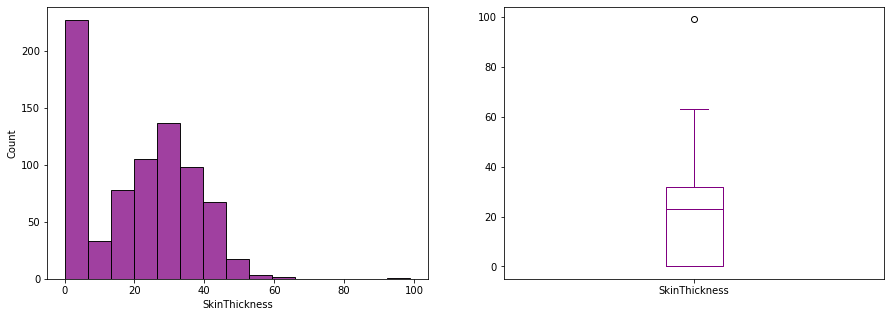

In [13]:
plt.figure(3)
plt.subplot(121)
sns.histplot(df["SkinThickness"],color="purple")
plt.subplot(122)
df["SkinThickness"].plot.box(figsize=(15,5),color="purple")

<AxesSubplot:>

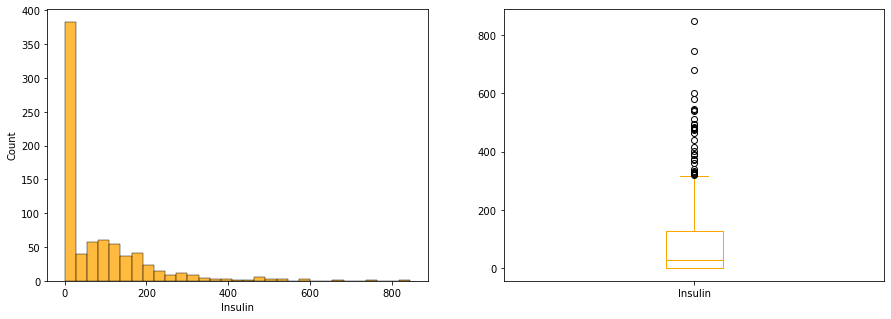

In [14]:
plt.figure(3)
plt.subplot(121)
sns.histplot(df["Insulin"],color="orange")
plt.subplot(122)
df["Insulin"].plot.box(figsize=(15,5),color="orange")

<AxesSubplot:>

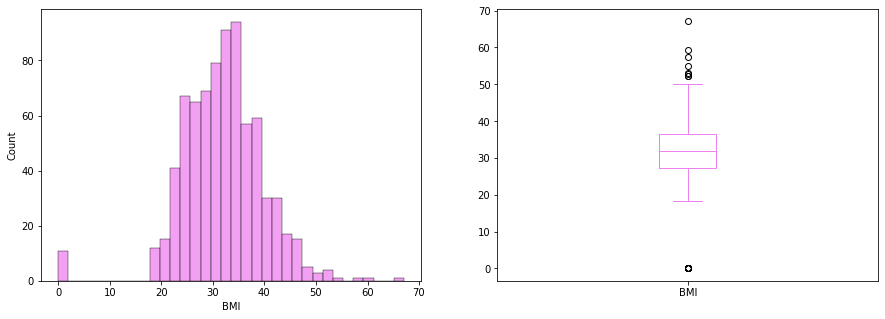

In [15]:
plt.figure(3)
plt.subplot(121)
sns.histplot(df["BMI"],color="violet")
plt.subplot(122)
df["BMI"].plot.box(figsize=(15,5),color="violet")

<AxesSubplot:>

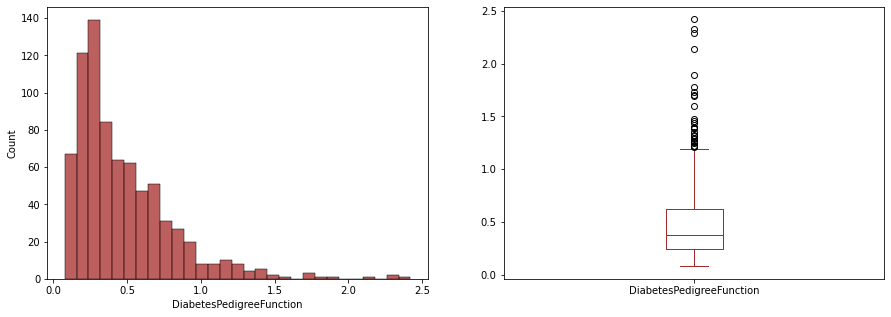

In [16]:
plt.figure(3)
plt.subplot(121)
sns.histplot(df["DiabetesPedigreeFunction"],color="brown")
plt.subplot(122)
df["DiabetesPedigreeFunction"].plot.box(figsize=(15,5),color="brown")

<AxesSubplot:>

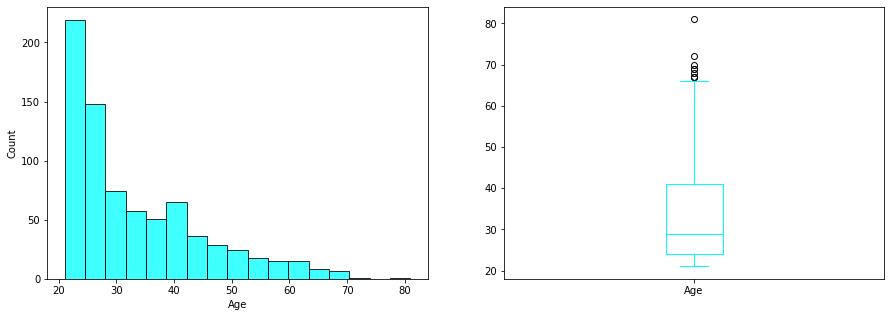

In [17]:
plt.figure(3)
plt.subplot(121)
sns.histplot(df["Age"],color="cyan")
plt.subplot(122)
df["Age"].plot.box(figsize=(15,5),color="cyan")

### Visualizing relationship through scatter plot

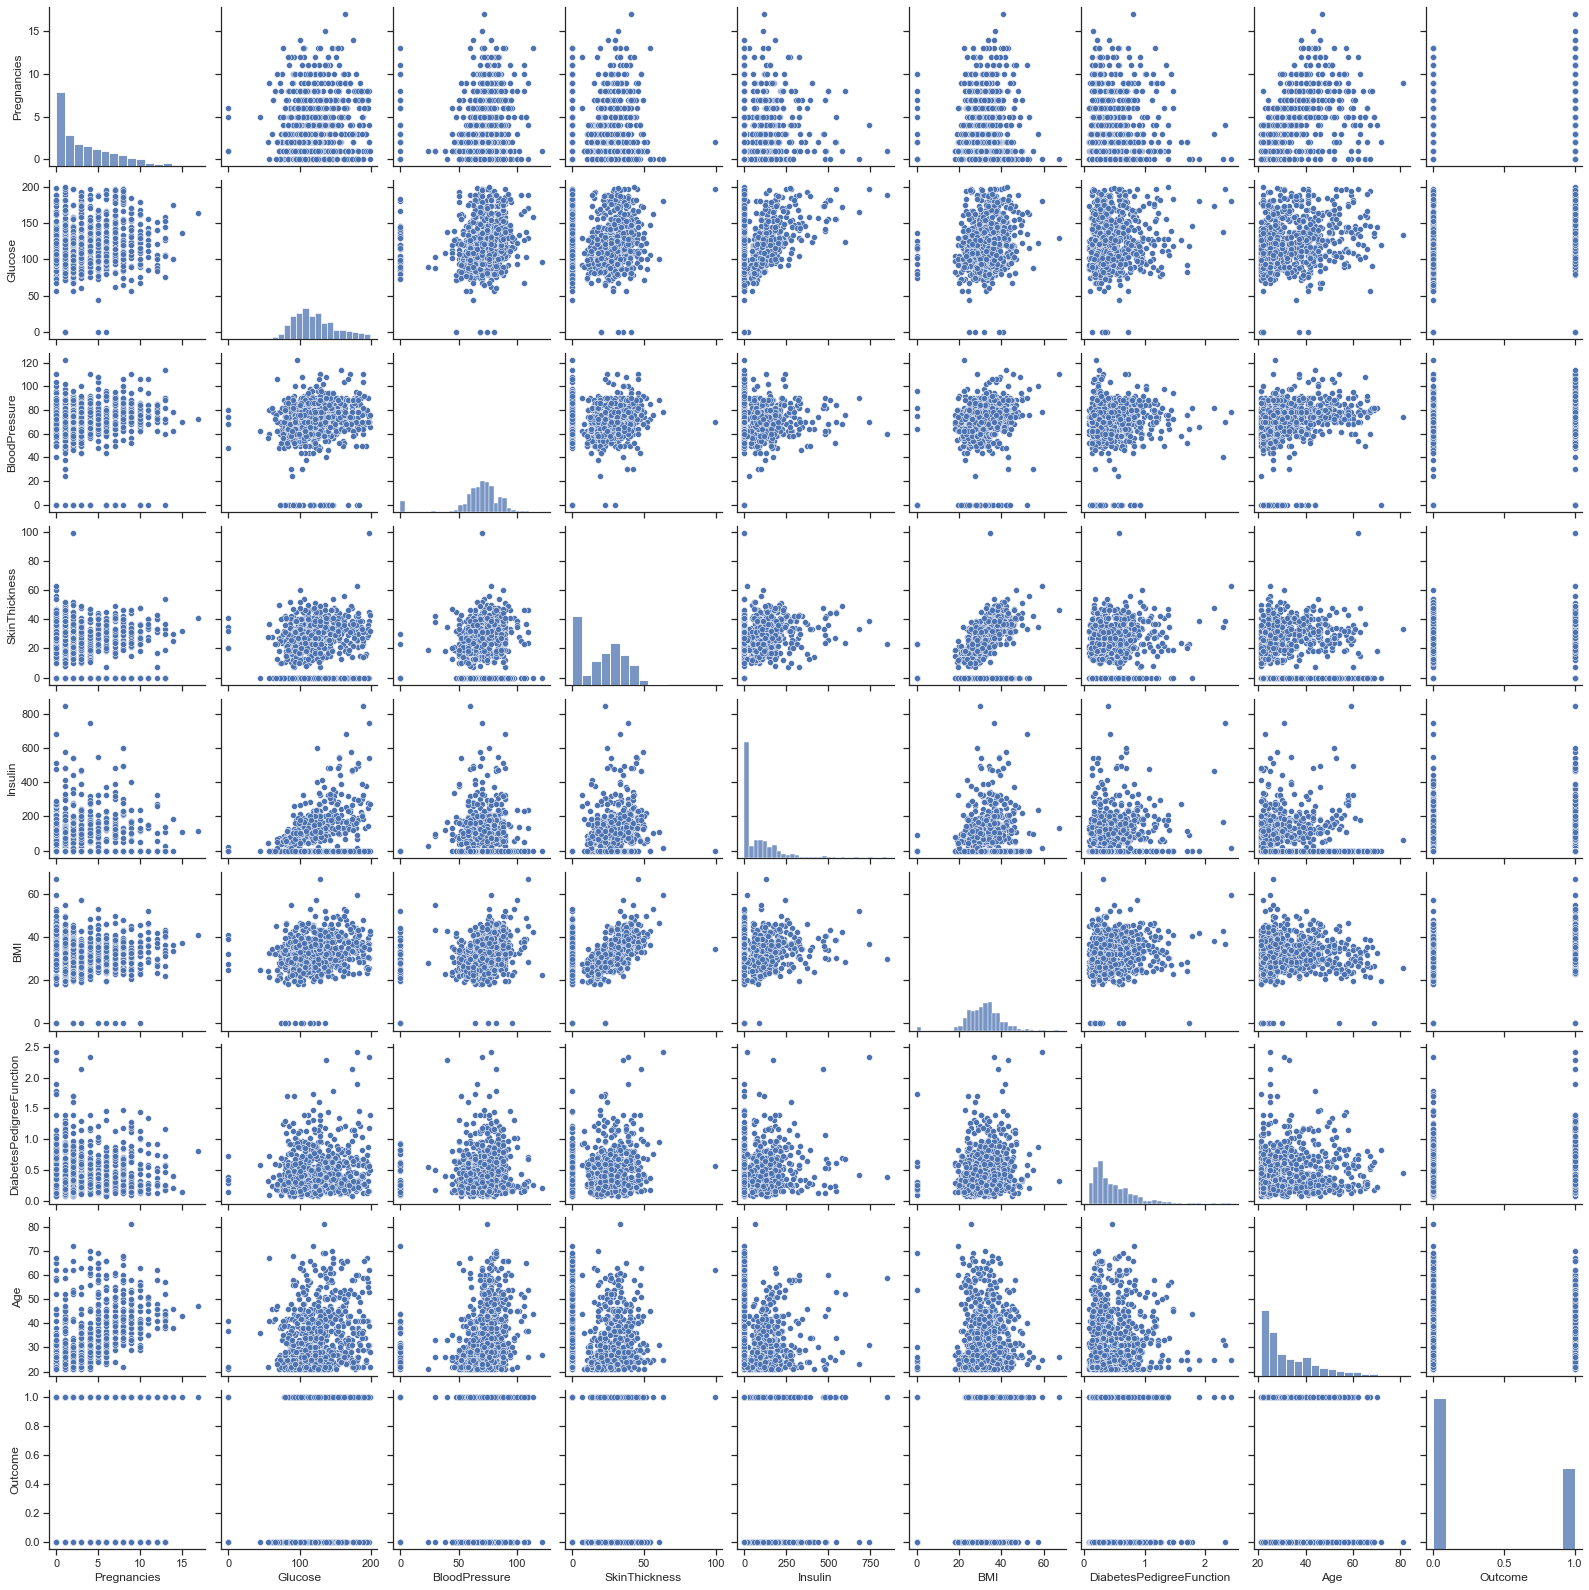

In [18]:
sns.set(style="ticks",color_codes=True)
sns.pairplot(df)

#### Correlation of each column

In [19]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [20]:
corr_matrix=df.corr()

### Visualizing the correlation through heatmap

<AxesSubplot:>

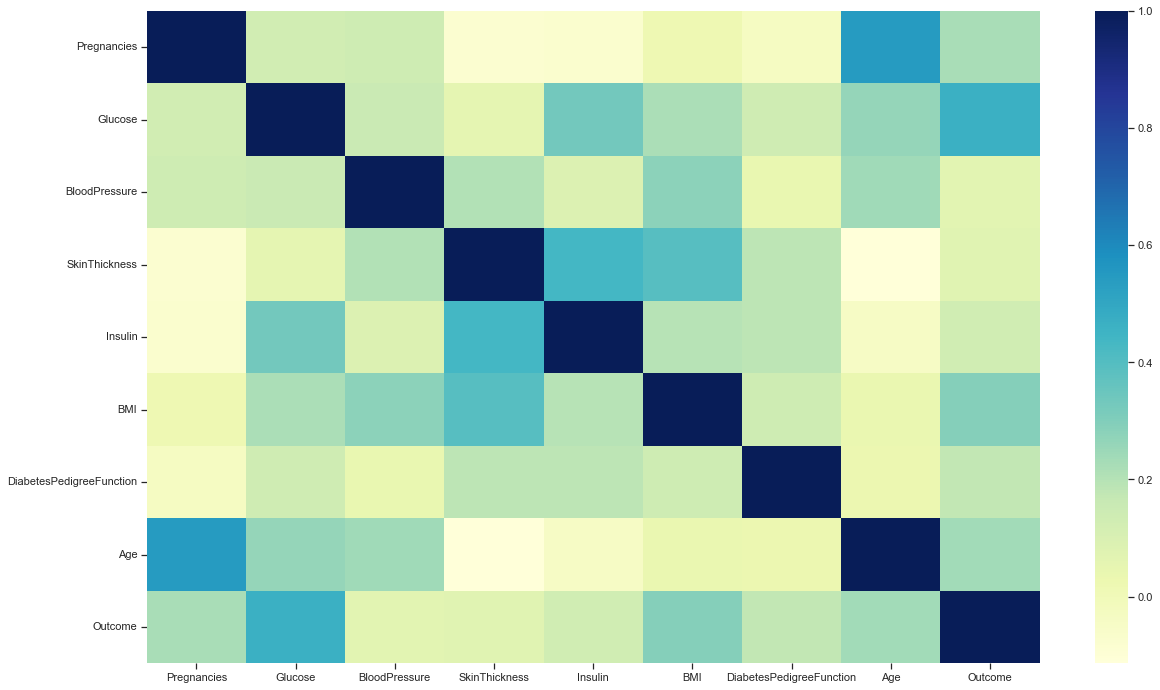

In [21]:
fig_dim=(20,12)
fig,ax=plt.subplots(figsize=fig_dim)
sns.heatmap(corr_matrix,ax=ax,cmap="YlGnBu")

#### Training data and Testing data

In [22]:
input=df.drop(["Outcome"],axis="columns")
target=df["Outcome"]

# Approach 1 : GridSearchCV

### Finding best model and best hyperparameters 

In [23]:
model_params = {
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [10,100,200]
        }
    },
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
            
        }
    }     
}

In [24]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(input, target)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

In [25]:
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,random_forest,0.772209,{'n_estimators': 200}
1,svm,0.768279,"{'C': 10, 'kernel': 'linear'}"
2,logistic_regression,0.768288,{'C': 5}
3,decision_tree,0.712359,{'criterion': 'gini'}


### Based on above result, we can say that Random Forest is the best model with n estimators=200

# Approach 2 : K Fold Cross Validation

### Using best hyperparameters retrieved from GridSearchCV

### random forest performance using cross_val_score

In [26]:
score_RandomForest=cross_val_score(RandomForestClassifier(n_estimators=200),input, target,cv=10)
score_RandomForest

array([0.71428571, 0.79220779, 0.77922078, 0.66233766, 0.72727273,
       0.79220779, 0.80519481, 0.83116883, 0.71052632, 0.82894737])

In [27]:
np.average(score_RandomForest)

0.7643369788106631

#### Feature importance through Random Forest classifier 

In [28]:
rf_model=RandomForestClassifier(n_estimators=200)
rf_model.fit(input,target)

RandomForestClassifier(n_estimators=200)

In [29]:
rf_model.feature_importances_

array([0.08360035, 0.26500757, 0.09361687, 0.06632727, 0.07291455,
       0.15992586, 0.12370596, 0.13490158])

<AxesSubplot:>

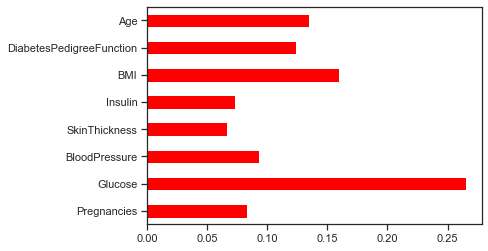

In [30]:
pd.Series(rf_model.feature_importances_,index=input.columns).plot(kind="barh",color="red")

### logistic regression performance using cross_val_score

In [31]:
score_LogisticRegression=cross_val_score(LogisticRegression(C=5,solver='liblinear',multi_class='auto'),input, target,cv=10)
score_LogisticRegression

array([0.74025974, 0.76623377, 0.80519481, 0.74025974, 0.75324675,
       0.75324675, 0.80519481, 0.80519481, 0.75      , 0.82894737])

In [32]:
np.average(score_LogisticRegression)

0.7747778537252221

### svm performance using cross_val_score

In [33]:
score_svm=cross_val_score(svm.SVC(gamma='auto',C=10,kernel="linear"),input, target,cv=10)
score_svm

array([0.71428571, 0.77922078, 0.79220779, 0.74025974, 0.75324675,
       0.76623377, 0.80519481, 0.79220779, 0.75      , 0.81578947])

In [34]:
np.average(score_svm)

0.7708646616541354

### decision tree performance using cross_val_score

In [35]:
score_DecisionTree=cross_val_score(DecisionTreeClassifier(criterion="gini"),input, target,cv=10)
score_DecisionTree

array([0.63636364, 0.71428571, 0.75324675, 0.57142857, 0.68831169,
       0.74025974, 0.81818182, 0.77922078, 0.63157895, 0.75      ])

In [36]:
np.average(score_DecisionTree)

0.7082877648667123

### Based on above results, we can say that Logistic Regression is the best model